In [27]:
#from google.colab import files
import pandas as pd

# Upload the file
#uploaded = files.upload()

# Assuming you uploaded 'file.csv', load it into a DataFrame
data = pd.read_csv('/content/Diwali_Sales_Data.csv',encoding="latin1")

# Display the first few rows
print(data.head())


   User_ID  Cust_name Product_ID Gender Age Group   Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35  28.0               0   
1  1000732     Kartik  P00110942      F     26-35  35.0               1   
2  1001990      Bindu  P00118542      F     26-35  35.0               1   
3  1001425     Sudevi  P00237842      M      0-17  16.0               0   
4  1000588       Joni  P00057942      M     26-35  28.0               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto     1.0   
1  Andhra Pradesh  Southern             Govt             Auto     3.0   
2   Uttar Pradesh   Central       Automobile             Auto     3.0   
3       Karnataka  Southern     Construction             Auto     2.0   
4         Gujarat   Western  Food Processing             Auto     2.0   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     Na

In [28]:
# Drop columns with all NaN values
data_cleaned = data.drop(columns=['Status', 'unnamed1'])

# Impute missing values with the median
data_cleaned['Age'].fillna(data_cleaned['Age'].median(), inplace=True)
data_cleaned['Orders'].fillna(data_cleaned['Orders'].median(), inplace=True)
data_cleaned['Amount'].fillna(data_cleaned['Amount'].median(), inplace=True)

# Verify that there are no missing values left
print(data_cleaned.isnull().sum())


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64


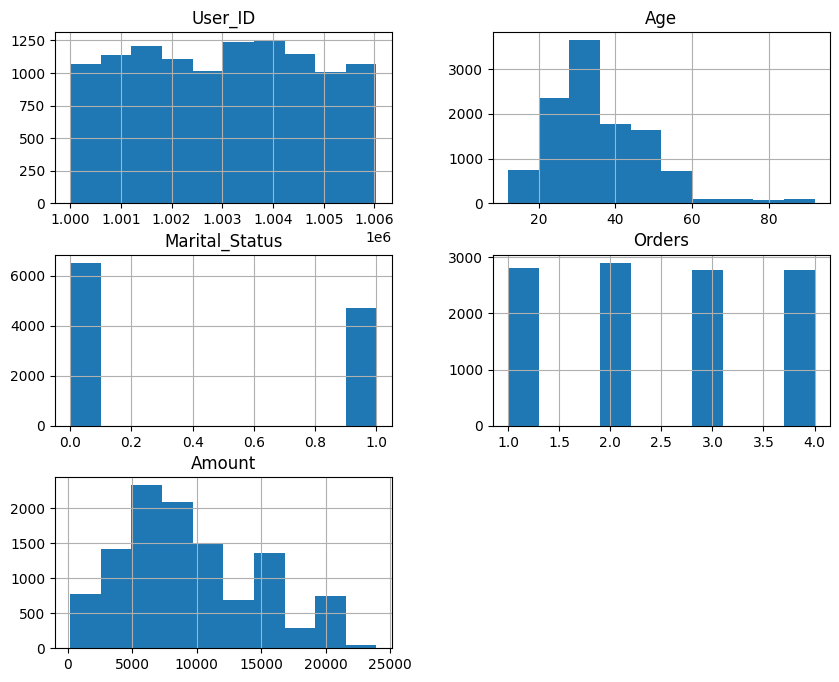

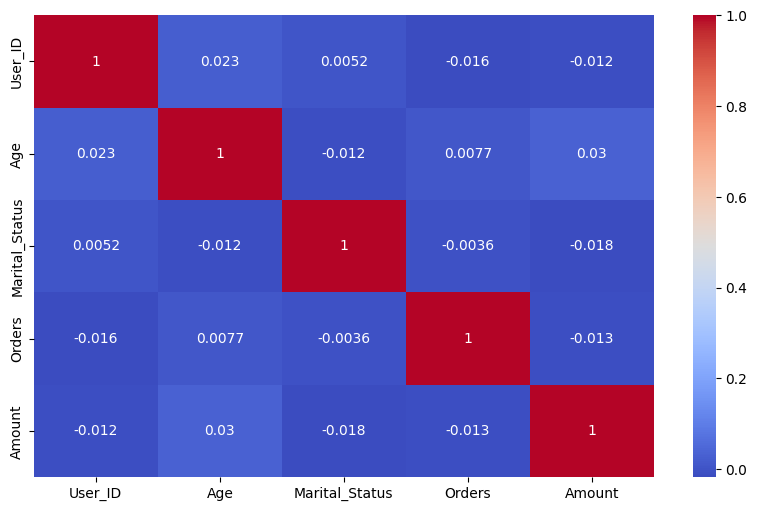

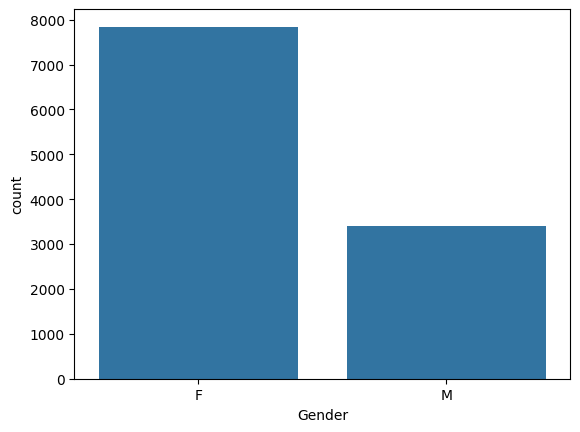

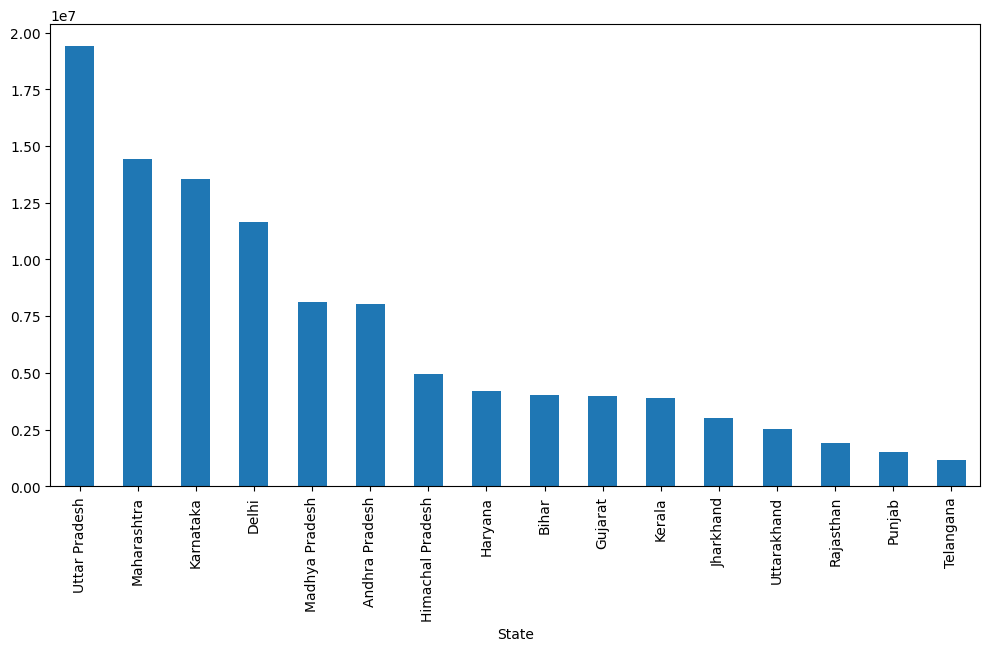

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of numerical features
data_cleaned.hist(figsize=(10, 8))
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Count of customers by gender
sns.countplot(data=data_cleaned, x='Gender')
plt.show()

# Total sales amount by state
state_sales = data_cleaned.groupby('State')['Amount'].sum().sort_values(ascending=False)
state_sales.plot(kind='bar', figsize=(12, 6))
plt.show()


In [30]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  float64
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  float64
 12  Amount            11251 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data_cleaned[['Age', 'Orders', 'Marital_Status']]  # Example features
y = data_cleaned[['Amount']]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Compare models
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_predictions, squared=False))
print("Random Forest RMSE:", mean_squared_error(y_test, rf_predictions, squared=False))




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression RMSE: 5256.662405295515
Random Forest RMSE: 5392.719149422812
